In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

In [3]:
def blob_maker(centers):
    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1.
    X, y = make_blobs(
        n_samples=10000,
        centers=centers,
        cluster_std=1,
        n_features=2,
        random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()
    
    return (X, y)

In [4]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [5]:
def mean_shift():
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))

    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))

In [6]:
from sklearn.cluster import SpectralClustering

In [7]:
def spectral_clustering():
    # We know we're looking for three clusters.
    n_clusters=3

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))

In [8]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

In [9]:
def affinity_propagation():
    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the
    # exemplar and lines from the exemplar to each data point in the cluster.
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [11]:
def clusters(k):
    # Calculate predicted values.
    y_pred = KMeans(n_clusters=k, random_state=42).fit_predict(X_pca)

    # Plot the solution.
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_pred, y))
    return y_pred

In [12]:
# The coordinates of the centers of our blobs.
centers1 = [[2, 2], [-2, -2], [2, -2]]
centers2 = [[2.5, 2.5], [-2.5, -2.5], [2.5, -2.5], [-2.5, 2.5]]
centers3 = [[1.5, 1.5], [-1.5, -1.5]]
centers4 = [[0, 0], [1.75, 1.25], [3, 4], [-1, 2], [-2, -1.75]]

groups = [centers1, centers2, centers3, centers4]

Make blobs: 
Centers =  [[2, 2], [-2, -2], [2, -2]]


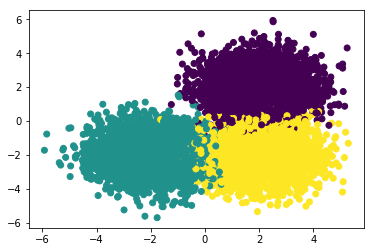



K-Means: 


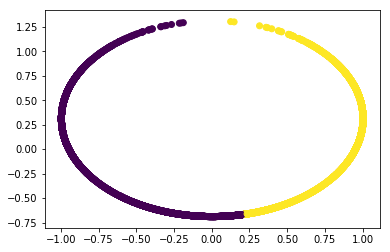

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0      3330    15  2438
1         4  3318   895


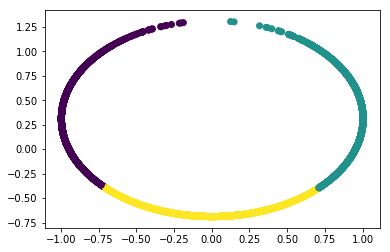

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0      3249     6    64
1         3  3254    86
2        82    73  3183


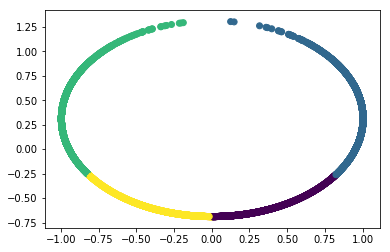

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0         7   182  1568
1         2  3138    43
2      3153     6    31
3       172     7  1691


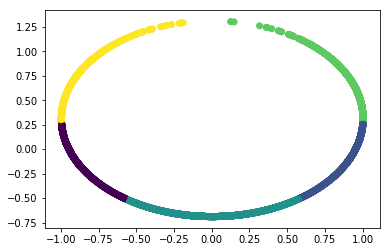

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0      1437     0   184
1         1  1536   162
2        37    43  2974
3         2  1748     8
4      1857     6     5


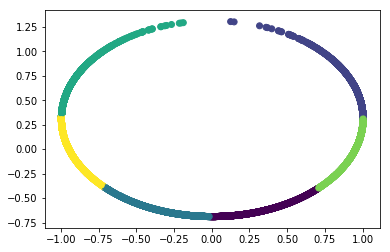

Comparing k-means clusters against the data:
col_0     0     1     2
row_0                  
0         8    66  1561
1         2  1633     8
2        75     7  1623
3      1595     6     5
4         1  1621    77
5      1653     0    59


Mean Shift: 
Number of estimated clusters: 3


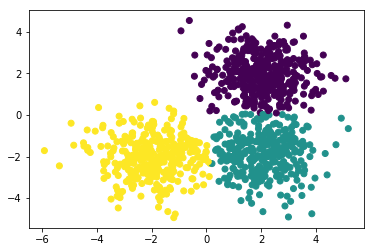

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


Spectral Clustering: 


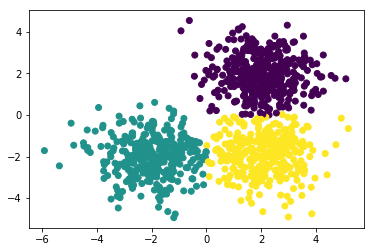

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      357    0    5
1        1  310    9
2        7    5  306


Affinity Propagation: 
Done
Estimated number of clusters: 93


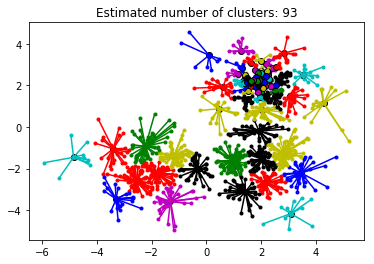



Make blobs: 
Centers =  [[2.5, 2.5], [-2.5, -2.5], [2.5, -2.5], [-2.5, 2.5]]


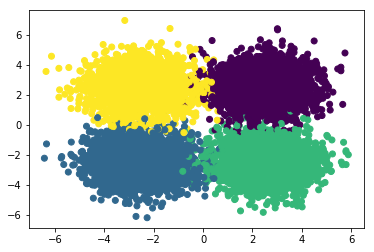



K-Means: 


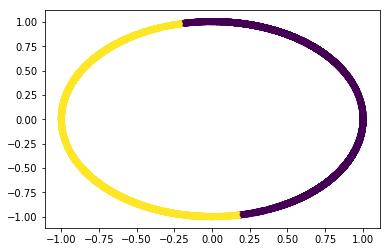

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0        21  2488  2486    16
1      2479    12    14  2484


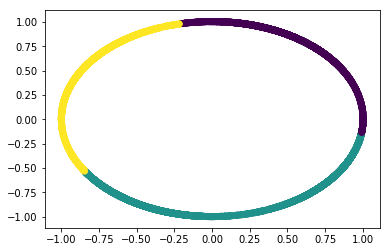

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0         0  2486   164    17
1      2313     2  2336     2
2       187    12     0  2481


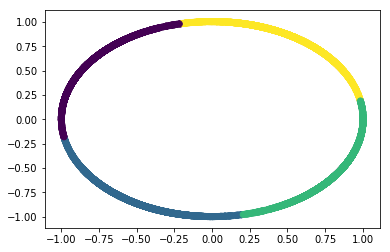

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0        19    12     0  2467
1      2463     0    14    16
2        18    25  2469     0
3         0  2463    17    17


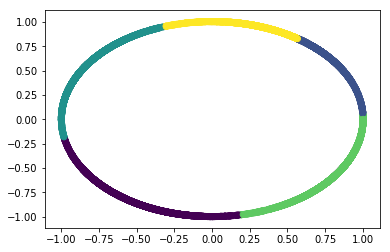

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0      2459     0    14    15
1         0  1211    50     0
2        20     4     0  2446
3        21     4  2435     0
4         0  1281     1    39


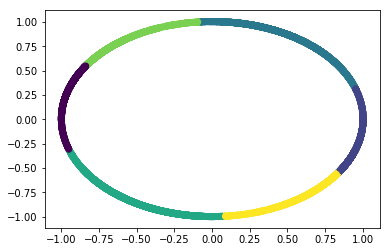

Comparing k-means clusters against the data:
col_0     0     1     2     3
row_0                        
0        37     0     0  1261
1         0    52  1208     0
2         0  2415     9     7
3      2428     0     6     5
4         0    33     0  1227
5        35     0  1277     0


Mean Shift: 
Number of estimated clusters: 4


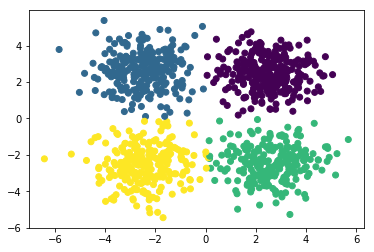

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      271    2    0    0
1        0    2    4  233
2        0    0  233    5
3        1  246    0    3


Spectral Clustering: 


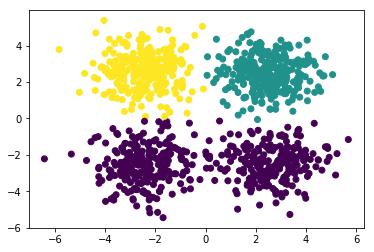

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  271    2
1      237    0    2
2      237    1    0
3        3    1  246


Affinity Propagation: 
Done
Estimated number of clusters: 164


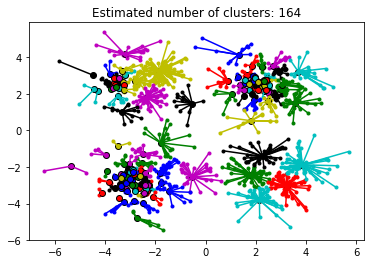



Make blobs: 
Centers =  [[1.5, 1.5], [-1.5, -1.5]]


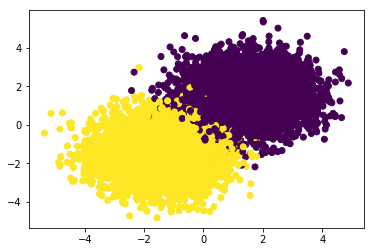



K-Means: 


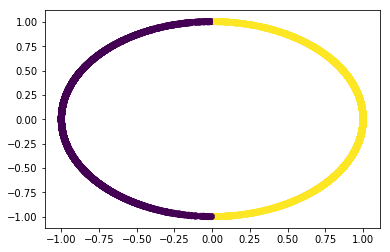

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      4921    83
1        79  4917


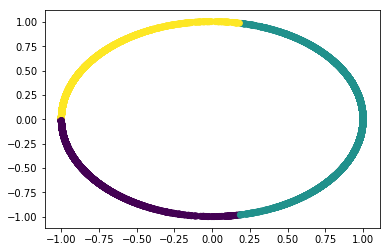

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      2476    63
1        52  4881
2      2472    56


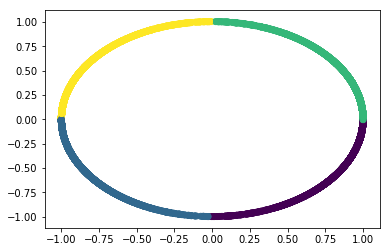

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0        46  2393
1      2469    41
2        34  2524
3      2451    42


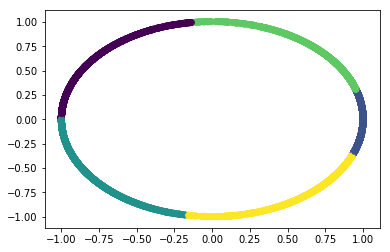

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      2432    37
1         3  2564
2      2454    31
3        49  1285
4        62  1083


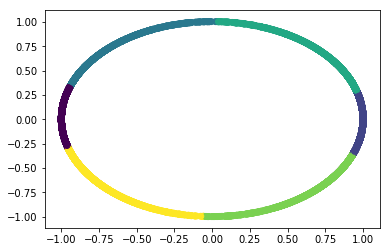

Comparing k-means clusters against the data:
col_0     0     1
row_0            
0      2446     5
1         3  2516
2      1144    40
3        33  1322
4        50  1083
5      1324    34


Mean Shift: 
Number of estimated clusters: 2


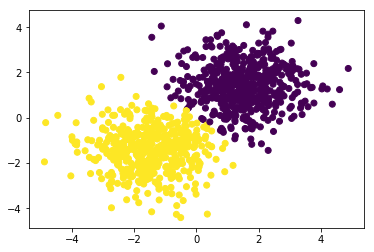

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      503    9
1       12  476


Spectral Clustering: 


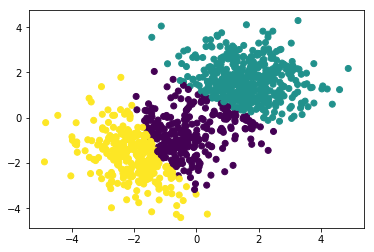

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       72  439    1
1      208    1  279


Affinity Propagation: 
Done
Estimated number of clusters: 125


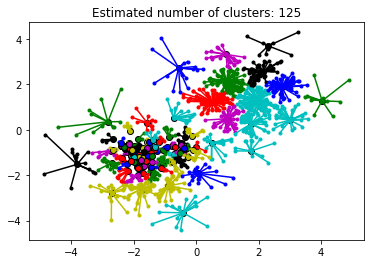



Make blobs: 
Centers =  [[0, 0], [1.75, 1.25], [3, 4], [-1, 2], [-2, -1.75]]


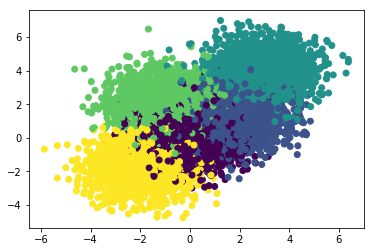



K-Means: 


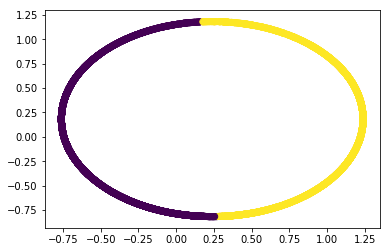

Comparing k-means clusters against the data:
col_0     0     1     2     3     4
row_0                              
0       990  1962  2000  1566    10
1      1010    38     0   434  1990


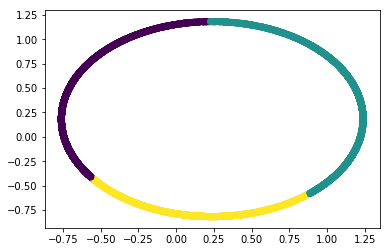

Comparing k-means clusters against the data:
col_0    0     1     2     3     4
row_0                             
0      706  1853  1981   225     5
1      776    30     0    58  1943
2      518   117    19  1717    52


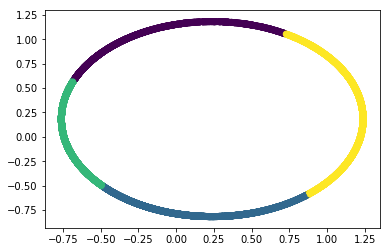

Comparing k-means clusters against the data:
col_0    0     1     2     3     4
row_0                             
0      501   598     9     9    16
1      466    90     9  1633    48
2      417  1302  1982   299     2
3      616    10     0    59  1934


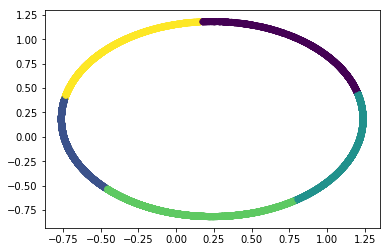

Comparing k-means clusters against the data:
col_0    0    1     2     3     4
row_0                            
0      444   28     0     4   389
1      340  985  1921   314     1
2      379    7     0    68  1578
3      435   85     9  1605    28
4      402  895    70     9     4


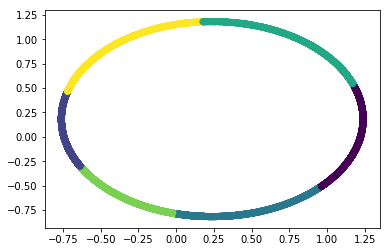

Comparing k-means clusters against the data:
col_0    0    1     2    3     4
row_0                           
0      345    5     0   37  1610
1      283  991  1890  133     0
2      337   16     0  856    70
3      416   28     0    4   311
4      252  164    75  963     5
5      367  796    35    7     4


Mean Shift: 
Number of estimated clusters: 1


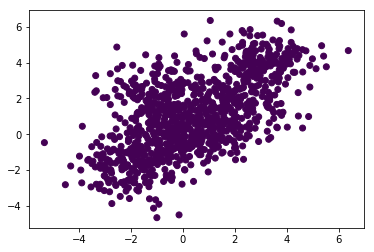

Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      221
1      203
2      191
3      187
4      198


Spectral Clustering: 


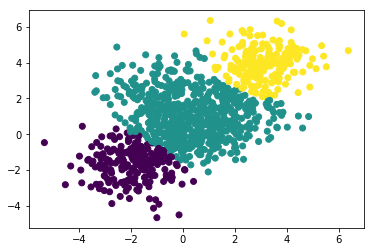

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       22  199    0
1        0  188   15
2        0   16  175
3        0  186    1
4      185   13    0


Affinity Propagation: 
Done
Estimated number of clusters: 125


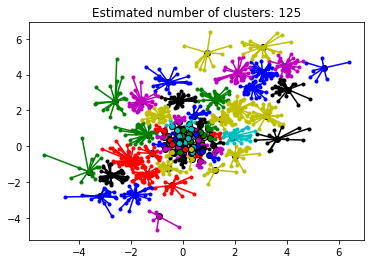

In [13]:
for cs in groups:
    print('Make blobs: ')
    print('Centers = ', cs)
    Xy = blob_maker(cs)
    
    print()
    print()
    X, y = Xy[0], Xy[1]

    # Normalize the data.
    X_norm = normalize(X)

    # Reduce it to two components.
    X_pca = PCA(2).fit_transform(X_norm)
    
    print('K-Means: ')
    for k in range(2,7):
        clusters(k)
        
    print()
    print()
    
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)

    print('Mean Shift: ')
    mean_shift()
    print()
    print()
    print('Spectral Clustering: ')
    spectral_clustering()
    print()
    print()
    print('Affinity Propagation: ')
    affinity_propagation()
    print()
    print()